In [3]:
#import libraries
#Dataset download link：https://www.kaggle.com/datasets/danielgrijalvas/movies/data

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
#%matplotlib inline 是一个魔术命令（magic command），
#它的作用是设置 matplotlib 图形的显示方式。
#当执行这个命令后，绘制出的所有 matplotlib 图形将会直接嵌入到 Jupyter Notebook 的单元格中，而不是弹出一个新的窗口来展示图表。
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create,尺寸设置为宽度12英寸，高度8英寸。

#Read in the data

df = pd.read_csv(r'D:\就业思路\数据分析学习\作品集\跟着ALEX老师学第三个作品\data\movies.csv\movies.csv')

In [8]:
#Let's look at the data
# 显示 DataFrame 的前五行
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [23]:
#Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing * 100))
#df[col]返回的是一个列下的所有的series
#df[col].isnull()返回的是布尔值，false（0）或true（1）。
#np.mean()是求的平均值，np.mean(df[col].isnull())返回的是非空列的比例（百分比）。
#'{}-{}'并非是减法运算，而是打印'{列}-{此列缺失的百分比}'

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%


In [24]:
#Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [27]:
#Change data types for columns
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
#.astype('int64') 是一个方法调用，用于将该列的原始数据类型转换为指定的新类型。
#fillna(0)是用指定的值（这里是0）替换所有缺失值（NaN或NA），填充缺失值有助于后续的数据分析和计算。

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [16]:
#将released列中的年份提取作为新列yearcorrect
df['yearcorrect'] = df['released'].astype(str).str.extract(r'(\d{4})', expand=True)
#str.extract('正则表达式'，expand = True)是 Pandas 库中 Series 对象的一个方法，它用于从字符串类型的数据列中根据指定的正则表达式提取子串，并将结果以 DataFrame 的形式返回。这个方法在处理文本数据时非常有用，特别是当需要抽取特定模式或结构化信息的时候。
#expand = True：意味着正则表达式中的每一个捕获组都会作为新DataFrame的一列进行提取。
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


In [17]:
#对DataFrame对象进行排序操作
df = df.sort_values(by = ['gross'],inplace = False, ascending = False)
df.head()
#by=['gross']：指定了按照 'gross' 列的值来进行排序。
#inplace=False：如果设置为 True，那么原始的 DataFrame 会被直接修改，按照给定的方式进行排序；如果设置为 False（默认情况），则会返回一个新的已排序的 DataFrame，而原始 DataFrame 不变。
#ascending = False:False 时，会按降序排列，也就是从大到小的顺序；若设置为 True（默认情况），则是按升序排列，即从小到大的顺序。

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,NaN
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,NaN
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,NaN
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,NaN
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,NaN


In [40]:
pd.set_option('display.max_rows',None)
#'display.max_rows'：这是一个与显示相关的选项，指定了在输出时能够显示的最大行数。
#None：表示无限制，即无论 DataFrame 的大小如何，都会全部显示其所有行的内容。

In [7]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending  = False)  

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
447                                      Zoetrope Studios
302                                      Zoetrope Studios
724                                      Zoetrope Studios
520                                      Zoetrope Studios
352                                      Zoetrope Studios
332                                      Zoetrope Studios
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222          

In [9]:
pd.set_option('display.max_rows',None)

In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,NaN
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,NaN
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,NaN
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,NaN
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,NaN


In [ ]:
# Budget high correlation
# company high correlation

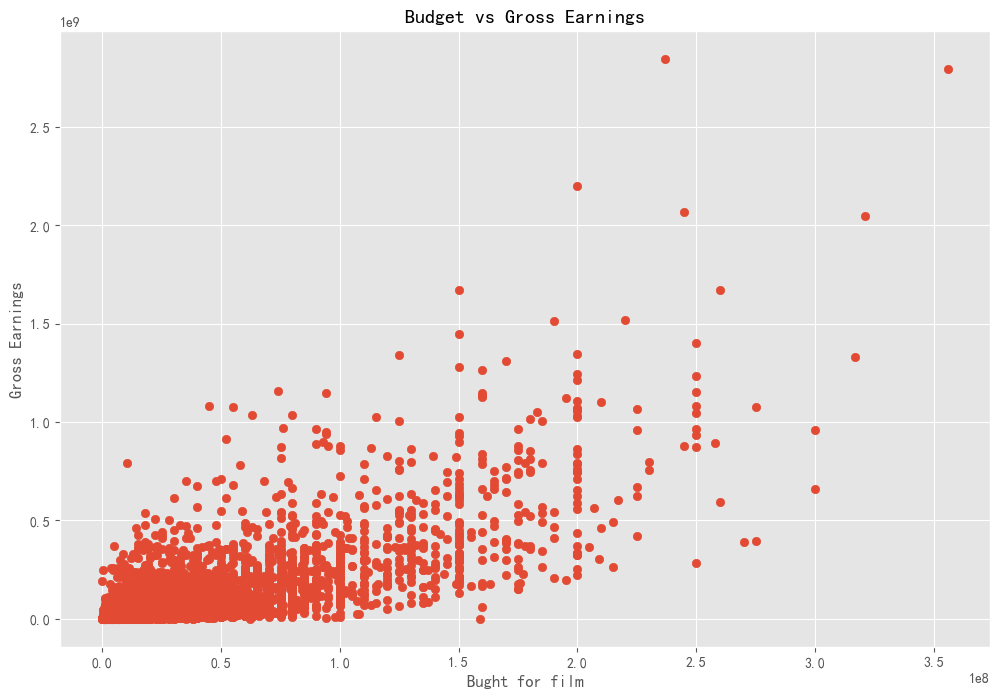

In [12]:
#Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Bught for film')

plt.ylabel('Gross Earnings')

plt.show()

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

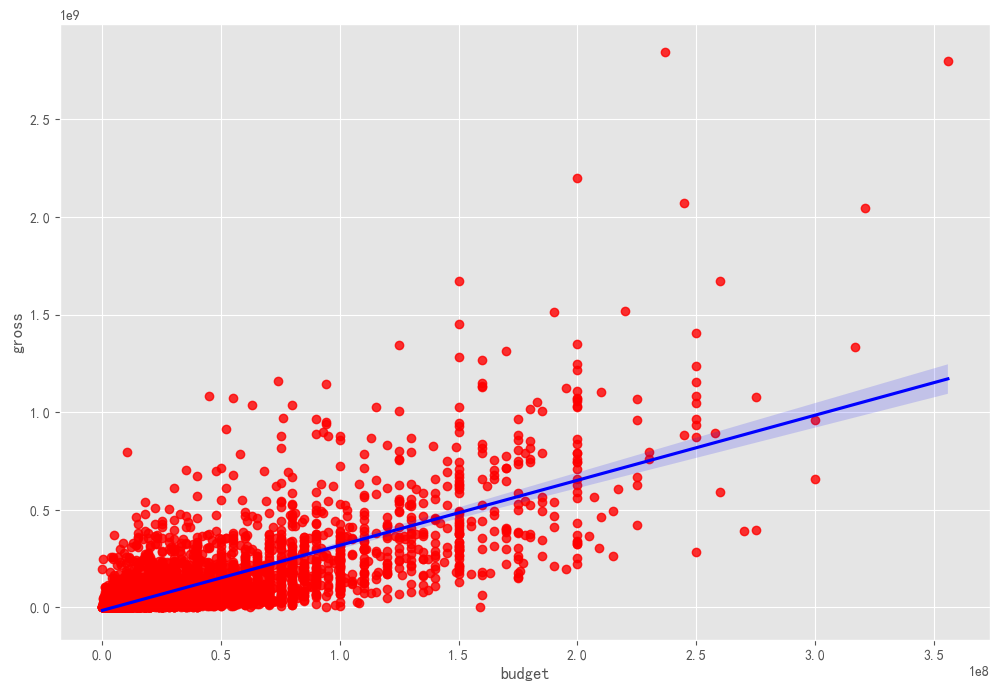

In [13]:
# Plot Budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [19]:
# Let's start looking at correlation


In [17]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr()
#df.corr() 返回的是一个相关系数矩阵，其中每个元素代表了 DataFrame 中两列之间的线性相关程度。
#数值范围：相关系数的取值范围在 -1 到 1 之间。
#当系数为 1 时，表示两个变量之间存在完全正相关，即一个变量增加时，另一个变量也按比例增加。
#当系数为 -1 时，表示完全负相关，一个变量增加时，另一个变量按相同的比例减少。
#当系数接近于 0 时，表示两者之间没有显著的线性关系或弱相关。

In [18]:
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [ ]:
#从上面的数据可以看出，与gross正相关性最强的是budget.

In [21]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr(method = 'pearson')  #pearson, kendall, spearman
#默认值是pearson

In [22]:
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [23]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr(method = 'kendall')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [24]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr(method = 'spearman')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


Text(122.72222222222221, 0.5, 'Movie Features')

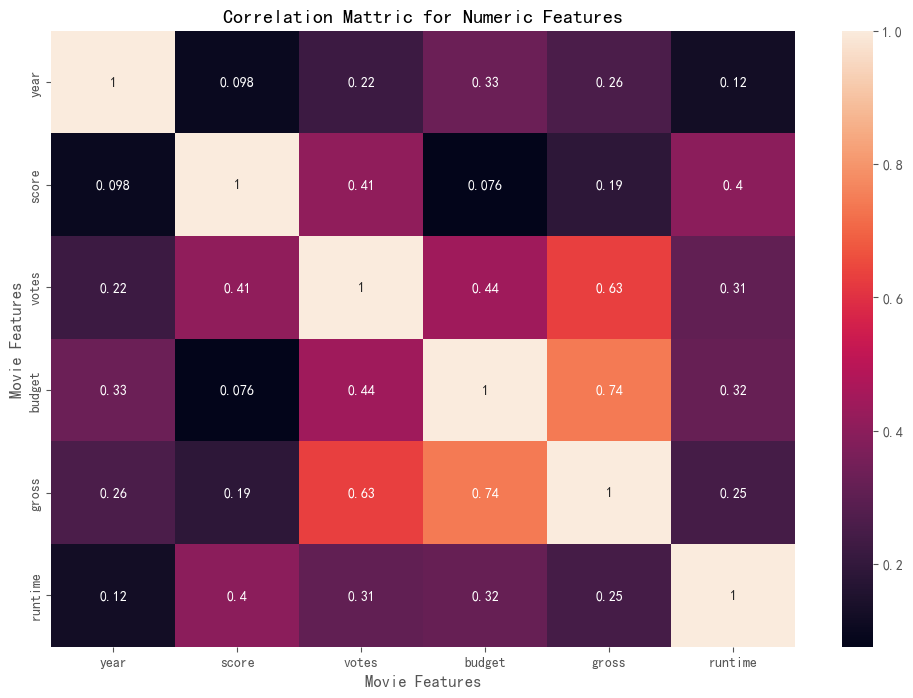

In [26]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
#sns.heatmap() 函数用于绘制热力图。
#annot = True 表示在热力图的每个单元格内显示具体的数值（即相关系数）。
plt.title('Correlation Mattric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

In [ ]:
# Looks at Company

In [19]:
df_numerized = df   #这意味着对 df_numerized 的任何更改都会反映到原始的 df 上。
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')  #这样做可以对非数值类别变量进行编码，使得它们在数学操作中变得可用。
        df_numerized[col_name] = df_numerized[col_name].cat.codes  #将转换后的 Categorical 列进一步转化为整数编码
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,-1
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,-1
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,-1
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,-1
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,-1


In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


Text(122.72222222222221, 0.5, 'Movie Features')

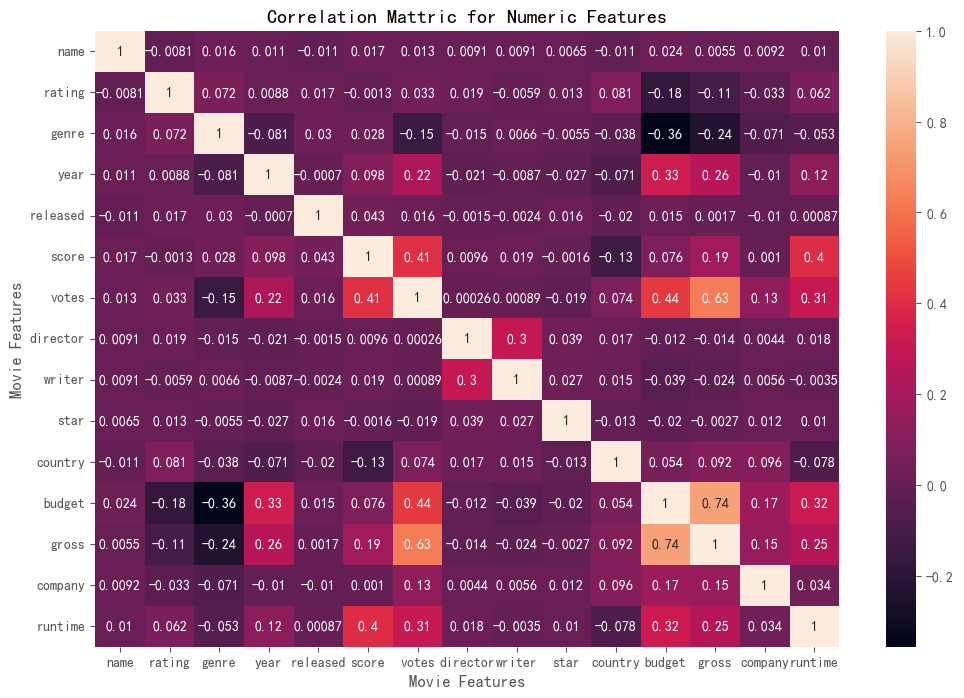

In [30]:
# 将所有的列都转化成数值后查看其关系的热力图
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
#sns.heatmap() 函数用于绘制热力图。
#annot = True 表示在热力图的每个单元格内显示具体的数值（即相关系数）。
plt.title('Correlation Mattric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

In [11]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [12]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [13]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Results: Votes and budget have the highest correlation to gross earnings.
#Company has low correlation